In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

#Predicting salaries based on different features, such as gender


In [27]:
#Importing the data
path = 'your_path_salariesdata'
salaries = pd.read_csv(path)

salaries.head()


,Gender,Age,Department,Department_code,Years_exp,Tenure (months),Salary
0,0,25,Tech,7,7.5,7,74922
1,1,26,Operations,3,8.0,6,44375
2,0,24,Operations,3,7.0,8,82263
3,0,26,Operations,3,8.0,6,44375
4,0,29,Engineering,0,9.5,25,235405


In [28]:
salaries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1802 entries, 0 to 1801
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           1802 non-null   int64  
 1   Age              1802 non-null   int64  
 2   Department       1802 non-null   object 
 3   Department_code  1802 non-null   int64  
 4   Years_exp        1802 non-null   float64
 5   Tenure (months)  1802 non-null   int64  
 6   Salary           1802 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 98.7+ KB


In [29]:
salaries.describe()

,Gender,Age,Department_code,Years_exp,Tenure (months),Salary
count,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1.802000e+03
mean,0.276915,31.516648,4.093230,10.758324,48.376804,1.758266e+05
std,0.447598,5.225084,2.151448,2.612542,35.639826,1.055131e+05
min,0.000000,21.000000,0.000000,5.500000,6.000000,2.560000e+02
25%,0.000000,28.000000,2.000000,9.000000,23.000000,1.042170e+05
50%,0.000000,31.000000,4.000000,10.500000,39.000000,1.503300e+05
75%,1.000000,35.000000,7.000000,12.500000,66.000000,2.211358e+05
max,1.000000,56.000000,7.000000,23.000000,190.000000,1.024965e+06


<Axes: xlabel='Department', ylabel='count'>

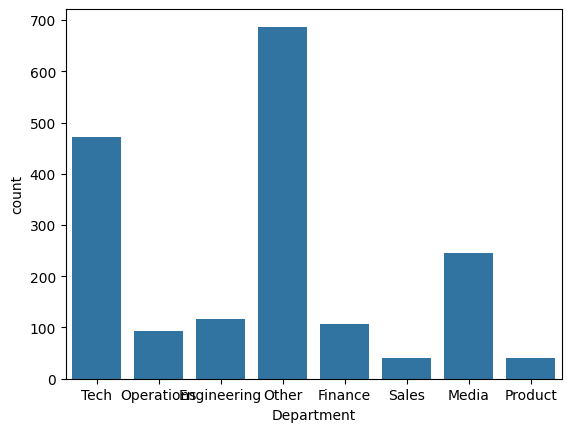

In [30]:
# Histogram to visualize the distribution of the salaries. 
sns.countplot(data=salaries, x='Department')


<Axes: xlabel='Age', ylabel='Salary'>

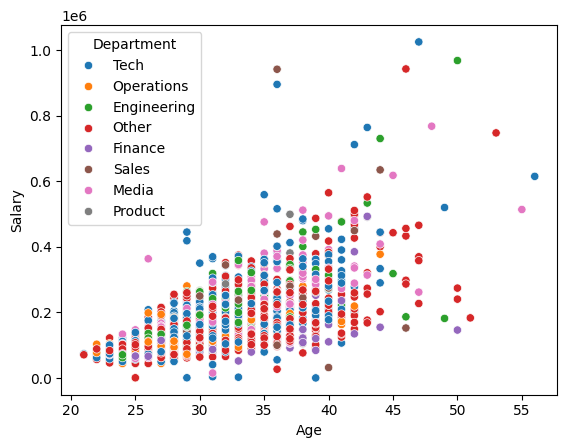

In [31]:
# diagram to visualize the distribution of the salaries according to age and department 
sns.scatterplot(data=salaries, x = 'Age', y='Salary', hue='Department')


In [34]:
# Building the model using Linear Regression

# Features. Separating the features (input) from the target (output)
features = salaries.drop(['Salary', 'Department'], axis='columns')
featuresage= salaries['Age']
target = salaries['Salary']

features.head()

,Gender,Age,Department_code,Years_exp,Tenure (months)
0,0,25,7,7.5,7
1,1,26,3,8.0,6
2,0,24,3,7.0,8
3,0,26,3,8.0,6
4,0,29,0,9.5,25


In [36]:
#extentiate the model

# Creating of the first instance of the model. Creating the variable. 
model = LinearRegression()

#Training it
model.fit(features, target)


LinearRegression()

In [37]:
#evalute the model


#R2 score. How much change in the target can be explained by changes in the features. 
model.score(features, target) 


0.43754799942321343

In [39]:
#Prediction
hire = [[0, 19, 7, 1, 10]]

print('The salary will be around', model.predict(hire))

The salary will be around [15123.2836477]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [40]:
#Coefficients of the model that we have trained. We see that for gender, if it changes between 0 and 1, it varies by almost 20 000. 0 between female, and 1 being male. 
model.coef_

array([-24245.70669339,   9467.18023663,   2351.48450104,   4733.59011832,
          249.19491939])

In [ ]:
#Intercept of the model. An intercept is the value at which the regression line crosses the y-axis.
model.intercept_